## Programming for Data Analysis - Project
### Submitted by Sinéad Duffy, ID:10016151

#### Problem Statement

Select a dataset that simulates a real-world phenomenon.   Create the dataset using synthesised data, and model using python.
***

#### Introduction

This project is completed as part of the Programming in Data Analysis module, and has been broken in to 4 distinct sections.  These are;

1. Chosing the real-world phenomenon, on which to model the data set.  The dataset must have at least 100 data points, across 4 variables.
2. Investigate the types of variables - their likely distributions, and relationships with each other.
3. Simulate a dataset closely matching the variables 
4. Detail your research and code in a Jupyter Notebook.

<br>
When looking at a dataset, it's important to look at the data before beginning any analysis.  Melissa Barnton of the Harvard Business School Online outlines 5 steps that need to be completed.$^2$  The author will be using these as a guide to direct the analysis.  The steps outlined are:
<br>

1. Clean your dataset
2. Start with a sepcific question and Hypothesis
3. Don't be biased by having a hypothesis in mind
4. Documentation is key
5. Always investigate the whys.

<br>
The author has decided to examine the Wine dataset from the UCI Machine Learning Repository.$^1$  The reasons why this data set was chosen is outlined in the next section, Section 1.
<br>

The first cell containing code (below) imports the python standard libaries.  It also defines global variables and styles for the notebook.  This cell must be run to successfully run the subsequent code cells in the notebook.
***

In [1]:
#import python standard libaries 
import numpy as np
from numpy.random import default_rng
rng = default_rng()

import csv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Section 1 - Choosing a dataset

As outlined previously, the UCI dataset on Wine is the choosen dataset.  Specifically the choosen dataset is the one donated in 1991.$^1$  The author has an inerest in wine, and would like to explore the subject further.

Specifically, the wine dataset was choosen as had 178 instances of data, across 13 variables, which is within the scope of the assignment.
<br><br>
The dataset is focused on red wine, so the data is consitent around a single product.  This eliminates the necessity for extensive cleaning of the data prior to use as all the data refers to the same item.
<br><br>
Finally, the source of the dataset is the Machine Learning Repository at UC Irvine.  The Repository has been in existance since 1987 and contains 559 datasets.$^1$
<br>
For the purposes of the research, wine is defined as drink made from fermented grapes, that includes an alcholic content.$^5$  This project with specifically look at red wine.
<br>

#### Cleaning the data

The dataset that will be used is going to be generated by the author.  This does not negate the need to look at the data in the Wine dataset for any errors it may contain.  This is so that if any errors in the orignal dataset are identified.  It also allows the author to avoid any errors in her own code.

The author downloaded the data files, and opened the wine.data file on her own pc using Microsoft Excel.  Excel was used as the dataset was relatively small, and could be handled easily.  When the dataset was opened, it was apparent that the names of the columns were not included in the dataset, see Example1.

The author downloaded wine.names file, and merged it with the wine.data file.  Example 2 outlines a summary of the cleaned data, with the column headings included.$^3$

In [ ]:
#Code Cell 1 - importing the dataset from UCI Machine Learing Repository
Wine_file= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')

#print the summary data of the datafile (refernece 3)
print(Wine_file.info())

In [ ]:
#Code Cell 2 - import cleaned data with headings from local drive
Wine_file2 = pd.read_csv('UCI_wine.csv')
print(Wine_file2.info())

### Section 2 - Exploring the variables

As outlined Section 1, the UCI dataset on Wine 178 instances of data, across 13 variables.  The dataset contains variables with 11 floats, and 3 integers
<br><br>
The variables included in the dataset are outlined below.  An explanation for each variable is included, the type of variable it is and finally the range of data that is stored in it.  Example 2 above outlines the variable type for each column.  An image of the data is include below.
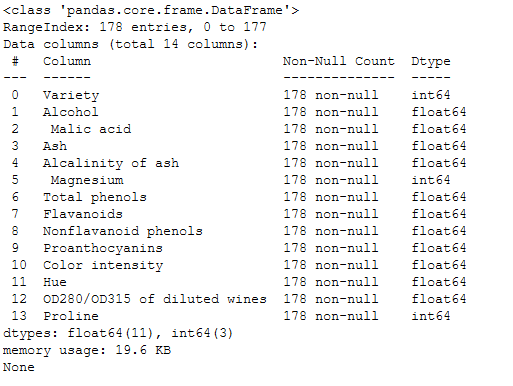
<br>
Example 3 outlines a high level summary of the data set using the method *describe()*$^4$

In [ ]:
#Code Cell 3 - print a summary of each variable in the dataframe
include =['object', 'float', 'int'] 
desc = Wine_file2.describe(include = include)  
print(desc)

The variable for each column is included below.
<br>

- **Variety** - There are 3 varieties of wine included in the dataset.  
- **Alcohol** - the level of alcohol present in the drink.  An analysi of the dataset outlined that the rang of this floating point number was between 11.03 and 14.83
- **Malic Acid** - is an organic compound found in all living things.  Specifically it contributes to teh sout taste of fruits. $^6$  In the dataset, the range of the floating point number was between 0.74 and 5.8
- **Ash** - relates to the elements of metals such as potassium / calcium etc that are left in the wine, after it has been processed.  This parameter is normally between 1.3 and 3.5 mg/l.$^7$  In our choosen dataset, the range of this variable is between 1.36 and 3.23
- **Alcalinity of ash** - is the amount of  positively charged ions that are present in the wine, against the organic acids present.$^7,8$  The range of this floating point number is between 10.6 and 30.00
- **Magnesium** - is a mineral that appears in wine.  Red wine has an average of 12mg per glass of wine. $^9$ The range of this integer value is between 70 to 162
- **Total Phenols** - these are naturally occuring phonemons that affect the taste, colour and 'mouthfeel' of wine. $^10$  The most commonly recognised compond would be Tannins.$^10$   The floating point range of this variable is 0.698 to 3.88. 
- **Flavanoids** - Are a phenolic compound found in wine$^11,12$.  The come froom the skin, stem and seeds of the grape, which is the source for up to 90% of the Flavanoids in wine$^12$.  The floating point range within this dataset is 0.34 to 5.08.
- **Nonflavanoid phenols** - are made up of different compounds, and have an influence on the taste and acid levels$^12$.  The dataset has a floating point range of 0.13 to 0.66.
- **Proanthocyanins** - are condensed tannins that influence the aromas, flavour and astringency of red wines.$^13$  The floating point range in the dataset is between 0.41 and 3.58
- **Colour Intensity** - is decided by the pigment of the skin of the grapes.$^14$.  The deep red coloured the wine, the higher the acidity.  If the wine being examined is 'very red', then it would have a pH 0.$^14$  The opposite is also true, the less red a wine, the lower level of acidity, and the higher the pH.  The data range within this sample is 1.2 to 13.
- **Hue** - related to colour intensity the hue of a wine expressed to the pH of the wine. The Wine dataset outlines a floating point range between 0.48 and 1.71
- **OD280/OD315 of diluted wines** - refers to the protein content in wine.  For the chosen data set, this variable is a floating point number between 1.27 and 4.$^16$
- **Proline** - refers to the content of amnio acid in the wine and has an influence on the flavour of the wine.  The proline of this dataset is an integer between 278 and 1680.$^16$

***

### Correlation of variables

A correlation shows the relationship or features between two values,$^26,27$. To display a correlation, Panda uses the function *data.corr()*. 
<br><br>
There are three different models of correlations that canbe used by Pandas.  They are;

1. Pearson's r - maps the linear relationsship between two variables.$^28$
2. Spearman's rho - maps the rank of variables.$^29$
3. Kendall's tau - maps the rank of variables against their position in the data, i.e first / second etc.$^30$

<br>
Exmple 5 below outlines the correlation of the dataset from UCI Machine Learning Repository.  'Ash' is the variable that has been used for the correlation, and is compared against each of the other variables.  The outcome of the correlaton has been defined in the table below$^28$.
<br><br>

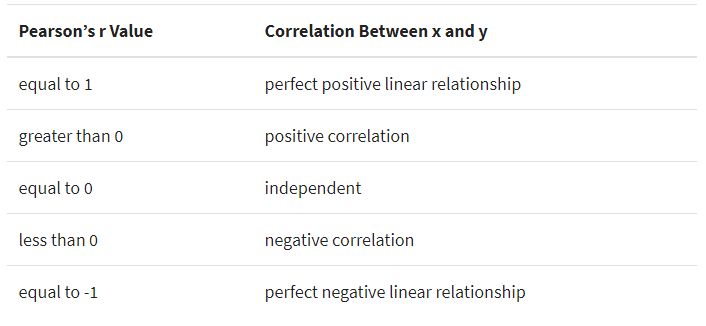

***

In [ ]:
#Code Cell 4 - correlation of variables in the dataframe

correlation = Wine_file2.corr()['Ash']
print(correlation)


### Section 3 - Synthesising the data

<br>
Using Numpy and the random number generator, the author will synthesis the data in the UCI Wine into a new dataset, called *df*.  The dataset will be created as as pandas dataframe $^17$, and use various numpy.random functions / classes to populate.
<br><br>
The author has choosen to simulate 6 of the variables orginally contained in the dataset.  The choosen variables are a mixtuere of floating point and integer numbers.  The choosen variables are;

- **Variety** 
- **Alcohol** 
- **Ash**
- **Magnesium** 
- **Flavanoids** 
- **Hue** 

***
The following sections will complete a number of parts of the process including;

1. Creating the dataset
2. Examining the data set in terms of its basic shape as well as describing key statistical features such as 
        a. count
        b. mean
        c. standard deviation
        d. min and max values
3. Print each of the variables in turn
4. Examine a correlation of the data to understand the relationships between variables.

<br><br>
When creating the dataset, the author has choosen to set a 'seed'.  This if for consistency, and to ensure that the plots generated and outlined by the author, are the same plots that are viewed by the reader.
***

#### Creating the data

In [18]:
#Code Cell 5 - Synthesising the Data

#Setting a seed to stop the data changing everytime that it runs.  
rng = default_rng(10)

#Step 1  ..create individual lists of random values 
#.. create lists is a more efficient use of memory than creating 
#and populating a dataframe - ref point 21

#Create random integer values between specified ranges using rng.integers()
variety = [rng.integers(1,4) for i in range(100)]
magnesium = [rng.integers(70,165) for i in range(100)]

#Create random float numbers between specified ranges using rng.uniform()
alcohol = [rng.uniform(11.0,15.0)for i in range(100)]
ash = [rng.uniform(1.30,3.25)for i in range(100)]
flavanoids = [rng.uniform(0.30,5.5)for i in range(100)]
hue = [rng.uniform(0.40,1.75)for i in range(100)]

#Step 2 ... create a dataframe in pandas, and name the columns
df = pd.DataFrame(list(zip(variety,alcohol,ash,magnesium, flavanoids, hue)))
df.columns=['Variety', 'Alcohol', 'Ash','Magnesium', 'Flavanoids', 'Hue' ]

#print out cpntents of the newly created dataframe
print(df)

    Variety    Alcohol       Ash  Magnesium  Flavanoids       Hue
0         3  12.561672  1.711690        149    3.924611  1.466552
1         3  14.581208  2.874124         92    3.633523  0.421728
2         1  11.926215  2.683060        101    1.936240  0.732396
3         1  12.777409  1.878572        142    2.684928  1.154683
4         3  11.576292  2.827553        151    4.550573  0.400668
..      ...        ...       ...        ...         ...       ...
95        2  11.501117  2.638023        120    2.789173  0.581805
96        3  13.144825  2.403575        114    4.596316  1.018344
97        2  12.433866  2.266670         71    0.868492  1.489544
98        2  11.429862  1.457350        129    1.848550  1.726958
99        1  12.404480  2.286485         71    0.386894  0.807006

[100 rows x 6 columns]


#### Examing details of the dataset

In [4]:
#Code Cell 6 - prints out details about the shape of the dataframe
#returns the number of rows, and columns in the dataframe
df.shape

(100, 6)

In [5]:
#Code Cell 7 - describe function to show basic statistical details for the 
#newly created dataframe df

df.describe()

,Variety,Alcohol,Ash,Magnesium,Flavanoids,Hue
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.990000,12.946013,2.261957,117.860000,3.012575,1.097349
std,0.822598,1.167112,0.559575,25.882805,1.492558,0.399120
min,1.000000,11.058194,1.312661,71.000000,0.326577,0.400668
25%,1.000000,12.013856,1.737120,96.000000,1.829121,0.783160
50%,2.000000,12.727825,2.270851,119.000000,3.247078,1.101053
75%,3.000000,14.122700,2.709686,142.250000,4.284426,1.480673
max,3.000000,14.916987,3.236179,163.000000,5.386478,1.733460


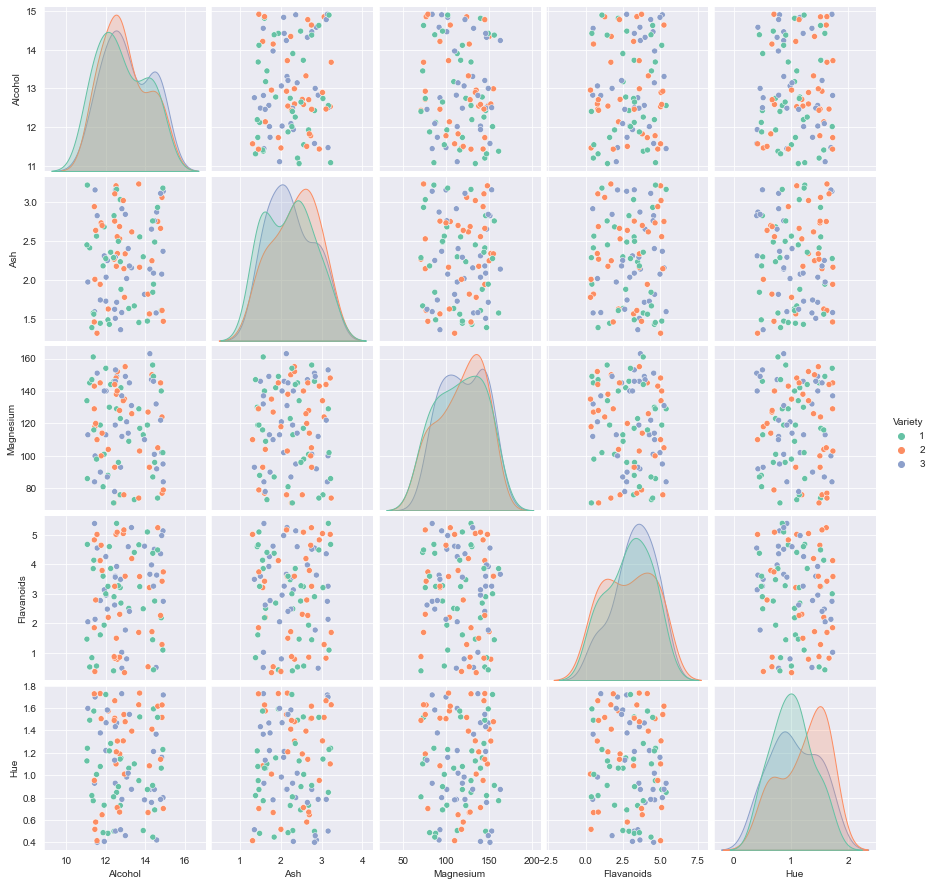

In [19]:
#Code Cell 8 - Print the plot of all the variables against 'Variety'
sns.pairplot(df, hue="Variety", palette="Set2")
plt.show()

#### Examining and Plotting the Variables created

#### Variable - Variety

The plot in the cell below identifies how the variable 'variety' is dispersed throughout the data frame.  The dataframe was created using 3 varieties, and was generated using a random number generator for three varieties using *rng.integers(1,4)*.  The plot above outlines that each variable appears approximately the same number of times.  Variety 1 however is slightly more common than varieties 2 and 3.

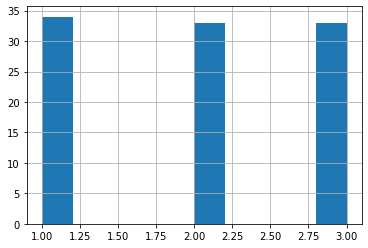

In [7]:
#Cell Code 9 - display the break down of each variety of wine
#plot created using pandas
df['Variety'].hist();

#### Variable - Alcohol

The plot in the cell below displays the variable of Alcohol which is plotted agains the 3 varieties of wine.  The most populated alcohol value is 12.5%, with variety 2 having the larger share of the value in this range.  The categor with the lowest value of alcohol is 13.5%, and variety 1 is the most common value in this group. 

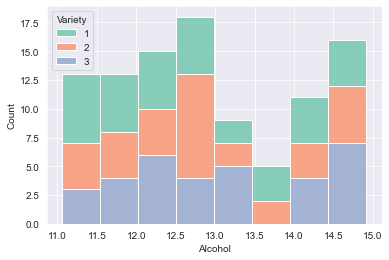

In [20]:
#Cell Code 10 - Plot the variable 'Alcohol'
sns.histplot(data=df, x="Alcohol", hue="Variety", multiple="stack", palette="Set2")
plt.show()

#### Variable - Ash

The plot in the cell below identifies how the variable of 'Ash' is displayed against the variety of wine. Ash is found most in the range of 1.50 to 1.75, where variety 3 of wine is has the largest representation.   Variety 2 has the most ash found in the range of 2.50 to 2.75.  Variety 1 wine has the most ash found in the variable 2.25 to 2.50.

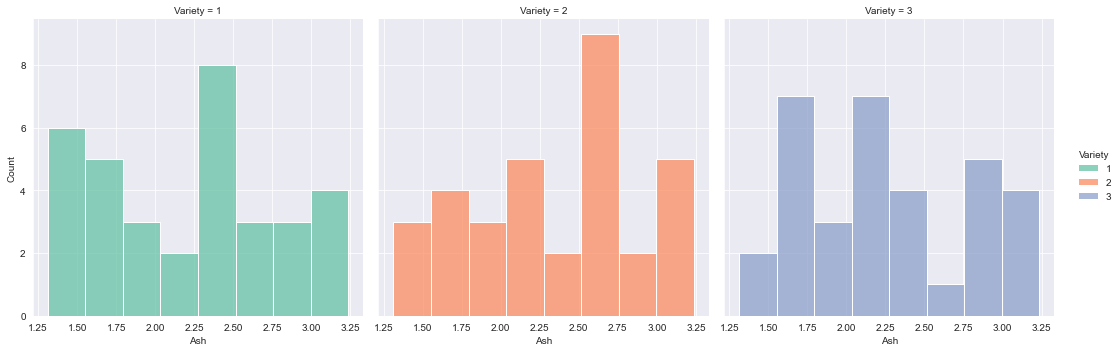

In [23]:
#Cell Code 11 - plotting the variable 'Ash'
sns.displot(data=df, x="Ash", hue="Variety", col="Variety", palette="Set2")
plt.show()

#### Variable - Magnesium

The plot in the cell below identifies how the variable of magnesium plots against the different varieties of wine.  The scatter plot outlines that there is a clear delineation between the magnesium is each of the varieties of wine.
<br>
The histogram plot outlnes how closely linked the variable are in the degree of overlap they show. 

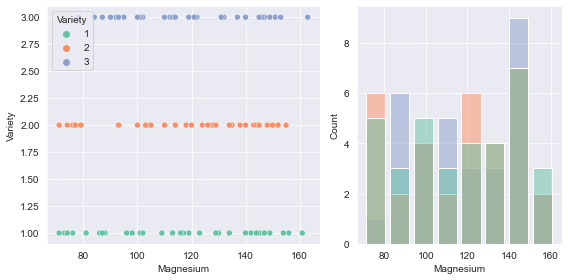

In [25]:
#Cell Code 11 - plotting the variable 'Magnesium'
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df, x="Magnesium", y="Variety", hue="Variety", ax=axs[0], palette="Set2")
sns.histplot(data=df, x="Magnesium", hue="Variety", shrink=.8, alpha=.5, legend=False, ax=axs[1], palette="Set2")
f.tight_layout()

#### Variable - Flavanoids

The plot in the cell below identifies how the flavanoid variable interacts with the variety of wine.  As the 3 plots show, flavanoids are dispered through the 3 varieties of wine.  All three varieties of wine have sizeable quanties of flavaniods that in the latter half of the segments.  Variety 2 have a large quantity in the first quandrant.

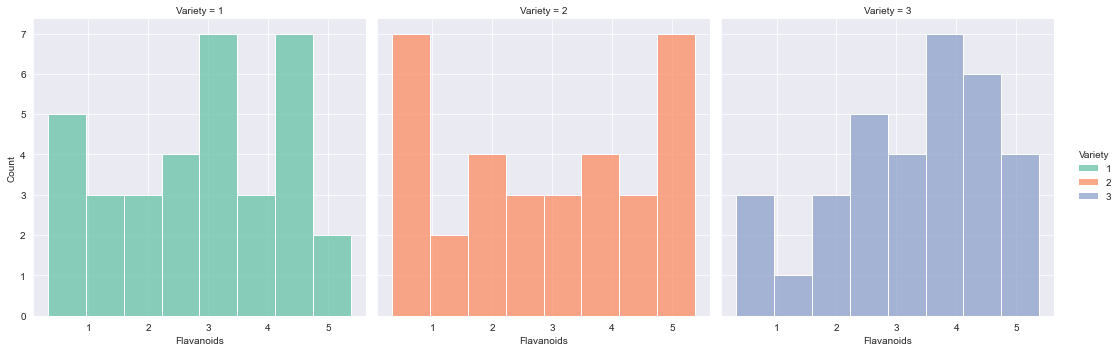

In [31]:
#Cell Code 13 - plotting the variable 'Flavanoids'
sns.displot(data=df, x="Flavanoids", hue="Variety", col="Variety", palette="Set2")

#### Variable - Hue

The plot in the cell below identifies how the variable 

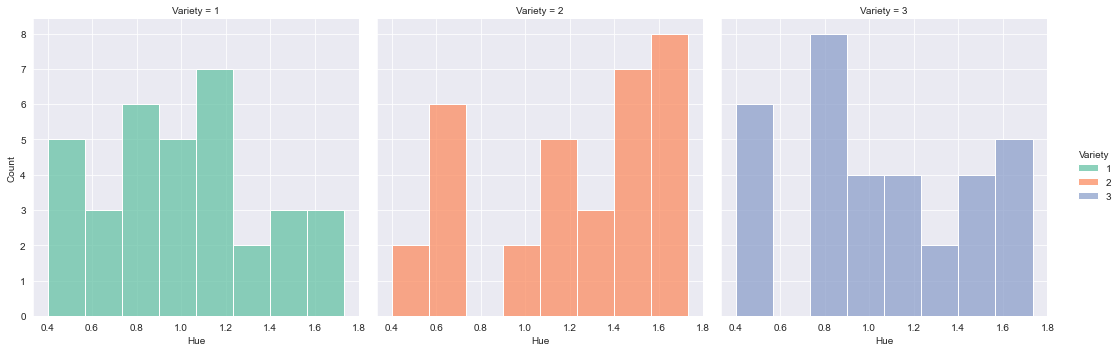

In [29]:
#Cell Code 14 - plotting the variable 'Hue'
sns.displot(data=df, x="Hue", hue="Variety", col="Variety", palette="Set2")
plt.show()

#### Heading XXXX

The plot in the cell below identifies how the variable 

In [ ]:
#refrence point 23
g = sns.FacetGrid(df, col="Alcohol", hue="Variety")
g.map(sns.scatterplot, "Ash", "Magnesium", alpha=.7)
g.add_legend()

#### Correlation and Matrices

XXXXX

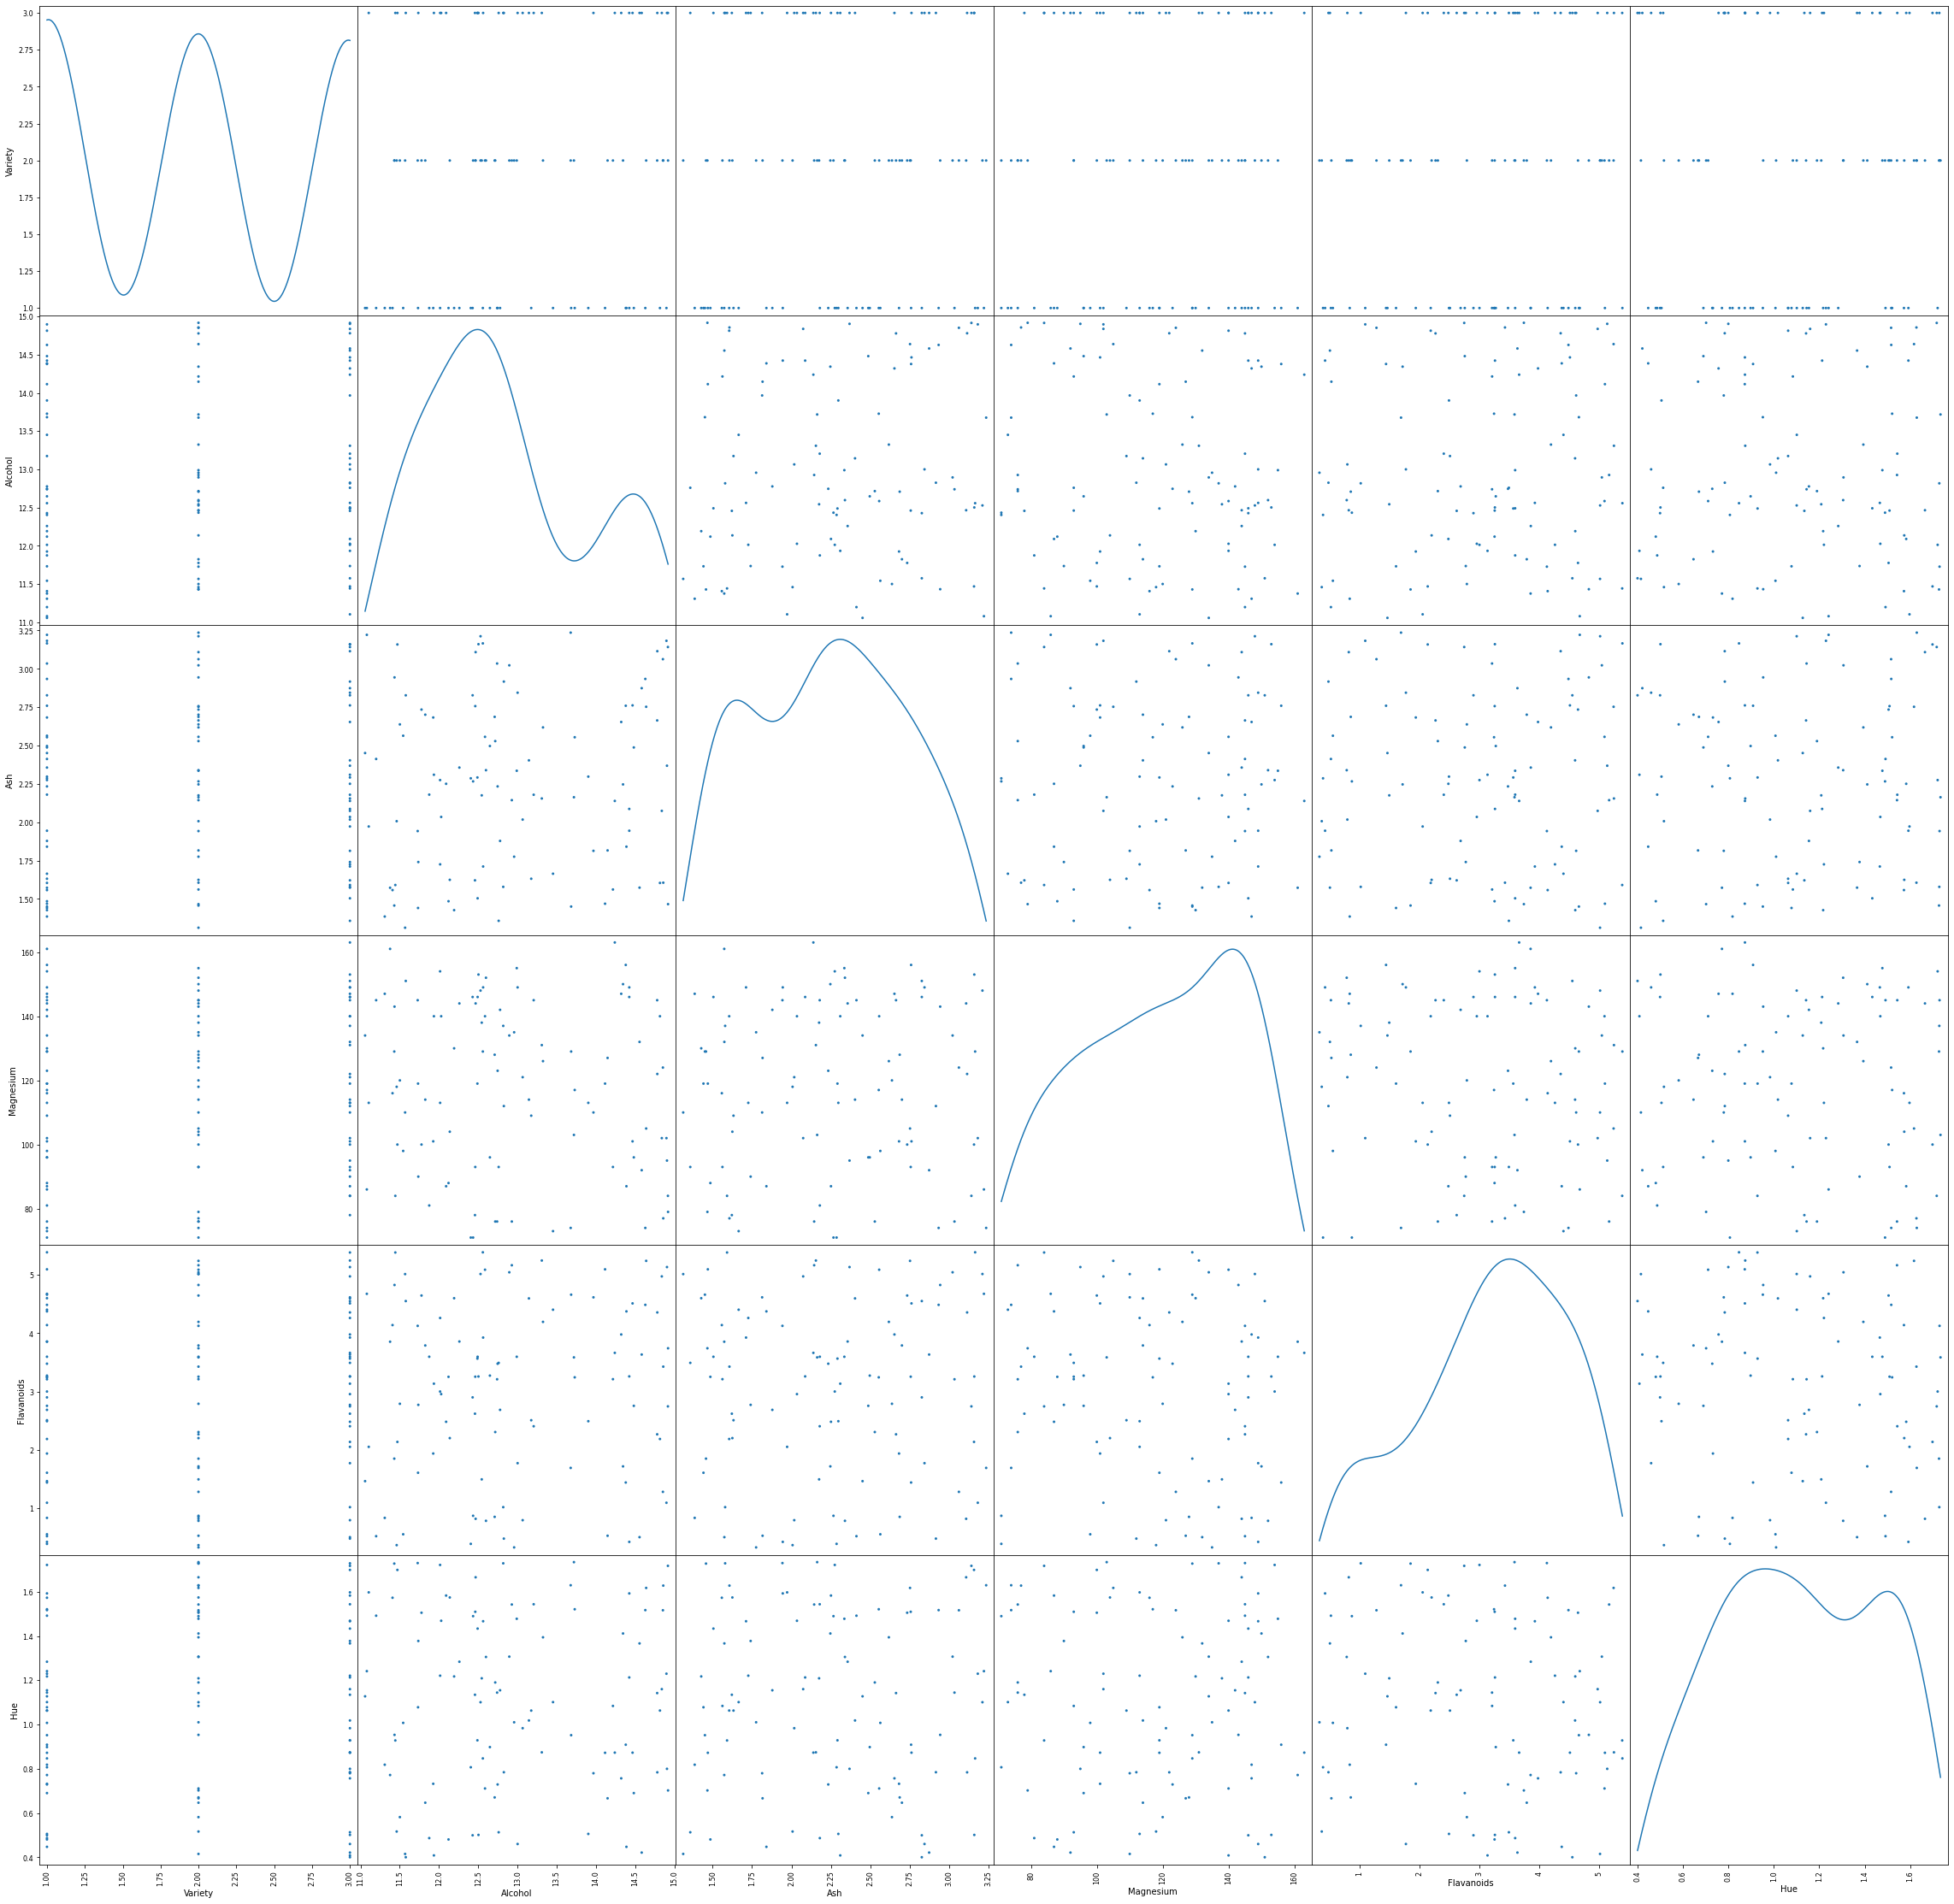

In [10]:
#Scatter Plot of the variables.(Ref point 24)
pd.plotting.scatter_matrix(df, alpha = 1, figsize = (40,40), diagonal = 'kde');
plt.show()

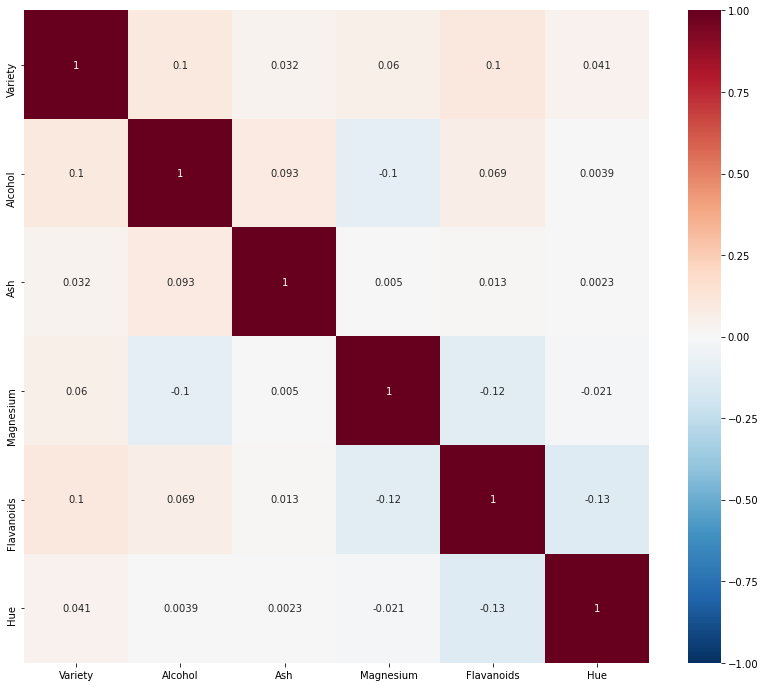

In [18]:
#reference point 24
correlation = df.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1556: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: distplot() got an unexpected keyword argument 'y'

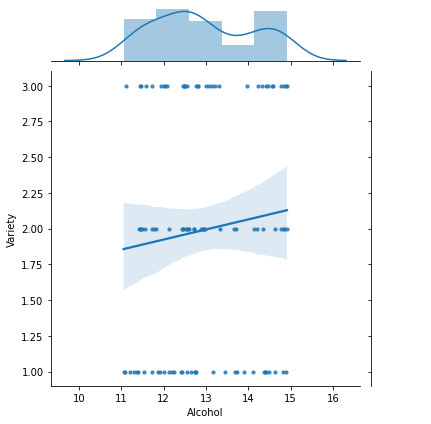

In [4]:
#plotting postive relationships

#Visualize the co-relation between variety & alcohol

#Create a new dataframe containing only variety & alcohol columns to visualize their co-relations
variety_alcohol = df[['Variety', 'Alcohol']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="Alcohol", y="Variety", data=variety_alcohol, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


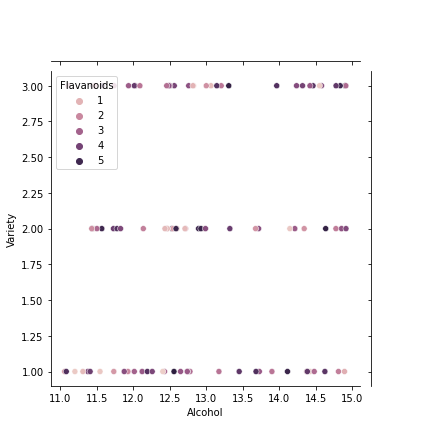

In [5]:
sns.jointplot(data=df, 
              x="Alcohol", 
              y="Variety", 
              hue="Flavanoids")

#### Refrences

References used during the course of this project are:
1. UCI Machine Learning Repository, Wine Data Set, https://archive.ics.uci.edu/ml/datasets/wine, accessed 01 December 2020
2. Harvard Business School Online, 5 Things to Remeber when Looking at a Dataset, https://online.hbs.edu/blog/post/5-things-to-remember-when-looking-at-a-dataset, accessed 15 December 2020
3. w3resources, Pandas: Display a summary of the basic information about a specified Dataframe, w3resource.com/python-exercises/pandas/python-pandas-data-frame-exercise-3.php, accessed 15 December 2020
4. GeekforGeeks, Describe Function, describe funtion - https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/, access 15 December 2020
5. Wikipedia, Wine, https://en.wikipedia.org/wiki/Wine, accessed 15 December 2020
6. Wikipedia, Malic Acid, https://en.wikipedia.org/wiki/Malic_acid#:~:text=Malic%20acid%20is%20an%20organic,the%20L%2Disomer%20exists%20naturally, accessed 15 December 2020
7. Institue Heidger, Ash, https://www.institut-heidger.de/ash-gravimetric-calculated-from-minerals-alkalinity-of-ash/?lang=en#:~:text=Ash%20content%20into%20wine%20lie,the%20biggest%20part%20of%20ash., accessed 15 December 2020
8. Lenntech.com, Ion Exchange for Dummies, https://www.lenntech.com/Data-sheets/Ion-Exchange-for-Dummies-RH.pdf, accessed 15 December 2020
9. USDA, FoodData Central - Wine, table, Red, https://fdc.nal.usda.gov/fdc-app.html#/food-details/1104473/nutrients, accessed 15 December 2020
10. Wikipedia, Phenolic Content in Wine, https://en.wikipedia.org/wiki/Phenolic_content_in_wine, accessed 15 December 2020
11. US National Library of Medicine, Wine Flavonoids in Health and Disease Prevention, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6155685/, accessed 15 December 2020
12. Wikipedia, Flavonoid, https://en.wikipedia.org/wiki/Flavonoid, accessed 15 December 2020
13. Wikipedia, Proanthocyanidin, https://en.wikipedia.org/wiki/Proanthocyanidin#Wine_consumption, accessed 15 December 2020
14. Wine Folly, Color, https://winefolly.com/deep-dive/know-a-wine-just-by-looking-at-the-color/, accessed 15 December 2020
15. Identification of red wine categories based on physicochemical properties,International Conference on Education Technology, Management and Humanities Science, Bai, Wang, Li, 2019 
16. Pandas.pydata.org, Pandas.DataFrame, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html, accessed 15 December 2020
17. Real Python, Using Pandas and Python to Explore Your Dataset, https://realpython.com/pandas-python-explore-dataset/, accessed 15 December 2020
18. w3schools.com, Python List / Array Methonds, https://www.w3schools.com/python/python_ref_list.asp, accessed 16 December 2020
19. GeekForGeeks, Adding Column Names to a dataframe in Pandas, https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/, accessed 16 December 2020
20. StackOverflow.com, Creating an empty Pandas DataFrame, https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it, accessed 16 December 2020
21. Shanelynn.ie, Using Pandas Dataframe, https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/, accessed 16 December 2020
22. Tomaugspurger.github.io, Modern Pandas, https://tomaugspurger.github.io/modern-1-intro.html, accessed 16 December 2020
23. Seaborn.Pydata.org, Tutorial, http://seaborn.pydata.org/tutorial/function_overview.html, accessed 16 December 2020
24. Freecodecamp, How to use Data Science to understand what makes wine taste good, https://www.freecodecamp.org/news/using-data-science-to-understand-what-makes-wine-taste-good-669b496c67ee/, accessed 16 December 2020
25. Kaggle.com, Red Wine Quality Analysis, https://www.kaggle.com/scsaurabh/red-wine-quality-analysis-python, accesed 20 December 2020
26. Pandas.pydata.org, Pandas.dataframe.corr, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html, accessed 20 December 2020
27. RealPython.com, NumPy, SciPy, and Pandas: Correlation With Python, https://realpython.com/numpy-scipy-pandas-correlation-python/, accessed 20 December 2020
28. Wikipedia.com, Pearson correlation coefficient , https://en.wikipedia.org/wiki/Pearson_correlation_coefficient, accessed 20 December 2020
29. Wikipedia.com, Spearman's rank correlation coefficient, https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient,accessed 20 December 2020
30. Wikipedia.com, Kendall rank correlation coefficient, ,accessed 20 December 2020
